In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('datasets/height_weight/height_weight.csv')

# Since height is in pound and weight is in inch.
# We're doing a bit conversion here
df.loc[:,'Height'] *= 0.0254
df.loc[:,'Weight'] *= 0.45359237

df

,Gender,Height,Weight
0,Male,1.875714,109.721075
1,Male,1.747060,73.622792
2,Male,1.882397,96.497629
3,Male,1.821967,99.809586
4,Male,1.774998,93.598695
...,...,...,...
9995,Female,1.680785,62.041210
9996,Female,1.703506,77.504378
9997,Female,1.622247,58.275424
9998,Female,1.753470,74.322226


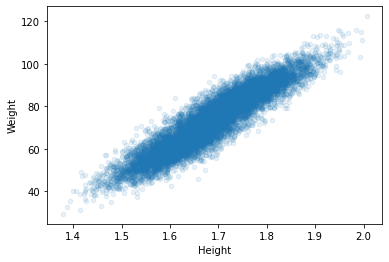

In [4]:
df.plot(kind='scatter', x = "Height", y = "Weight", alpha = 0.1)

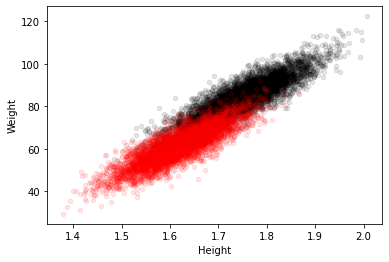

In [5]:
males   = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female'] 
fig, ax = plt.subplots()
males.plot(kind ='scatter', x = 'Height', y = 'Weight', ax = ax, color = 'black', alpha = 0.1)
females.plot(kind ='scatter', x = 'Height', y = 'Weight', ax = ax, color = 'red', alpha = 0.1)

In [6]:
# One hot encoding
df['Gender'].replace('Female', 0, inplace = True)
df['Gender'].replace('Male',1, inplace=True)
df


,Gender,Height,Weight
0,1,1.875714,109.721075
1,1,1.747060,73.622792
2,1,1.882397,96.497629
3,1,1.821967,99.809586
4,1,1.774998,93.598695
...,...,...,...
9995,0,1.680785,62.041210
9996,0,1.703506,77.504378
9997,0,1.622247,58.275424
9998,0,1.753470,74.322226


In [7]:
# Training and testing set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)


In [22]:
# Height
X = train_set.values[:,1]

# Weight
y = train_set.values[:,2]

In [27]:
X_b = np.c_[np.ones((8000,1)),X]
best_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
best_theta

# y_hat = -158.66108654 + 137.54537885*X

array([-158.66108654,  137.54537885])

In [48]:
X_new = np.array([[1.63],[1.5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(best_theta)
y_predict

array([65.53788099, 47.65698174])

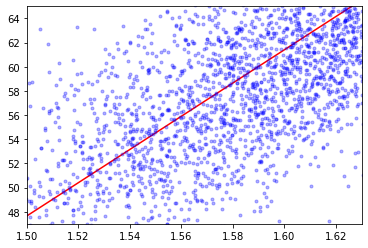

In [81]:
plt.plot(X_new, y_predict, 'r-') #red line
plt.plot(X, y, "b.", alpha = 0.3)
plt.axis([1.5, 1.63, 47, 65])
plt.show()

In [82]:
X_new = np.array([[1.56],[1.7]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(best_theta)
y_predict

array([55.90970447, 75.16605751])